In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy


In [7]:

from scipy.interpolate import interp1d,interpn

filename_result = '/global/cfs/cdirs/lz/users/cding/studyNEST_skew2D_notebooks/fit_values_allkeVnr_allparam_20240705.npz'   
with np.load(filename_result) as f:
    fit_values_allkeVnr_allparam = f['fit_values_allkeVnr_allparam']
    
print(fit_values_allkeVnr_allparam.shape)
    
if 1: 
    param0_choices = np.array([0.05,0.1,0.15,0.2,0.25,0.3,0.4,0.55,0.75,1.])          # Fano ion
    param1_choices = np.array([0.55,0.75,1.,1.5,2.0,2.5,3.0,3.5,4.0,6.0,8.0,12.0,16.0]) # Fano exciton
    param2_choices = np.array([0.,0.02,0.04,0.06,0.08])   # amplitude for non-binomial NR recombination fluctuations
    param3_choices = np.array([0.4,0.45,0.5,0.55,0.6])               # non-binomial: loc of elecfrac
    param5_choices = np.array([-8.,-5.,-3.,-1.5,0.,1.5,3.,5.,8.])                # raw skewness
    
    Fi = 0.249988
    Fex = 6.00012
    RawSkew = 0.943851
    NBloc=0.04
    NBamp=0.0


part1 = np.geomspace(1,4,7)
part2 = np.geomspace(4,80,23)[1:]
keVnr_choices = np.array([*part1,*part2])

skew2D_points = (param0_choices, param1_choices, param2_choices, param3_choices, param5_choices, keVnr_choices)

for ii in range(len(skew2D_points)):
    print(ii,':',len(skew2D_points[ii]))
    

Es = np.arange(1,75,0.25)
param_v_Es = np.zeros((len(Es),7))

for j,keVnr in enumerate(Es):
    for i in range(7):
        skew2D_values = fit_values_allkeVnr_allparam[:,:,:,:,:,:,i] # CHECK
        skew2D_select_NEST_param = np.array([Fi, Fex, NBamp, NBloc, RawSkew, keVnr]) # CHECK

        param_v_Es[j,i] = interpn(skew2D_points, skew2D_values, skew2D_select_NEST_param, bounds_error=False,fill_value=None)  
        
    
# RawSkews = np.arange(-10,10,0.1)
# param_v_RS = np.zeros((len(RawSkews),7))

# for j,RS in enumerate(RawSkews):
#     for i in range(7):
#         skew2D_values = fit_values_allkeVnr_allparam[:,:,:,:,:,:,i] # CHECK
#         skew2D_select_NEST_param = np.array([Fi, Fex, NBamp, NBloc, RS, 10.]) # CHECK

#         param_v_RS[j,i] = interpn(skew2D_points, skew2D_values, skew2D_select_NEST_param, bounds_error=False,fill_value=None)  
    
# print(skew2D_model_param) 



(10, 13, 5, 5, 9, 29, 7)
0 : 10
1 : 13
2 : 5
3 : 5
4 : 9
5 : 29


Nph_skew (RawSkew): 0.3235850749729463
Ne_skew (NBamp): 1.1613179112685506
initial_corr (NBloc): -0.14908813014477595


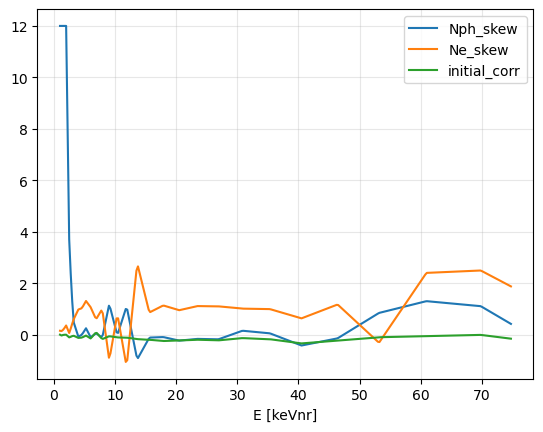

In [10]:
plt.plot(Es, param_v_Es[:,4],label='Nph_skew')
plt.plot(Es, param_v_Es[:,5],label='Ne_skew')
plt.plot(Es, param_v_Es[:,6],label='initial_corr')

print('Nph_skew (RawSkew):',param_v_Es[:,4][Es>5].mean())
print('Ne_skew (NBamp):',param_v_Es[:,5][Es>5].mean())
print('initial_corr (NBloc):',param_v_Es[:,6][Es>5].mean())

# Nph_skew = RawSkew*tf.ones_lik
# Ne_skew = NBamp*tf.ones_like(e
# initial_corr = NBloc*tf.ones_l

plt.legend()
plt.xlabel('E [keVnr]')
plt.grid(True,which='both',alpha=0.3)
plt.show()

# plt.plot(RawSkews, param_v_RS[:,4],label='Nph_skew')
# plt.plot(RawSkews, param_v_RS[:,5],label='Ne_skew')
# plt.plot(RawSkews, param_v_RS[:,6],label='initial_corr')

# plt.legend()
# plt.xlabel('RawSkew')